In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras import activations

Using TensorFlow backend.


In [2]:
# load dataset
(trainX,trainy),(testX,testy) = mnist.load_data()

In [3]:
# summarize loaded dataset
print('train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('test: X=%s, y=%s' % (testX.shape, testy.shape))

train: X=(60000, 28, 28), y=(60000,)
test: X=(10000, 28, 28), y=(10000,)


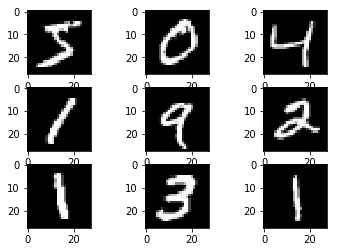

In [4]:
# plot first few images
for i in range(9):
    #define subplot
    plt.subplot(330+1+i)
    # plot raw pixel data
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
def reshape_and_normalize(trainX,testX):
    trainX = trainX.reshape(trainX.shape[0], 28, 28, 1)
    testX = testX.reshape(testX.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    # Making sure that the values are float so that we can get decimal points after division
    trainX = trainX.astype('float32')
    testX = testX.astype('float32')
    # Normalizing the RGB codes by dividing it to the max RGB value.
    trainX /= 255
    testX /= 255
    
    return trainX, testX

In [8]:
#Building the Convolutional Neural Network
# Creating a Sequential Model and adding the layers
def create_model():
    input_shape = trainX[0].shape
    model = Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(Dense(128, activation=activations.relu))
    model.add(Dropout(0.2))
    model.add(Dense(10,activation=activations.softmax))
    return model

In [9]:
trainX, testX = reshape_and_normalize(trainX,testX)
model = create_model()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=trainX,y=trainy, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.6338 - acc: 0.8104
Epoch 2/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.2495 - acc: 0.9256
Epoch 3/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.1796 - acc: 0.9468
Epoch 4/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.1459 - acc: 0.9565
Epoch 5/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.1262 - acc: 0.9618
Epoch 6/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.1123 - acc: 0.9652
Epoch 7/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.1027 - acc: 0.9683
Epoch 8/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0938 - acc: 0.9705
Epoch 9/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0864 - acc: 0.9730
Epoch 10/10
60000/60000 [==============================] - 19s 316us/step - loss: 

In [13]:
# evaluate
def model_evaluate(testX,testy):
    return model.evaluate(testX, testy)

model_evaluate(testX,testy)

10000/10000 [==============================] - 1s 77us/step


[0.07302852024612948, 0.9781]

9


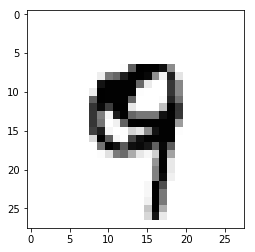

In [16]:
# test
def model_pred(image):
    pred = model.predict(testX[image_index].reshape(1,28,28,1))
    return pred.argmax()


image_index = 4444
plt.imshow(testX[image_index].reshape(28,28),cmap='Greys')
number = model_pred(testX[image_index])
print(number)